In [1]:
import numpy as np
from fermi_sim import *
from scipy import*
from scipy import sparse
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from Hamiltonian_topo import *

$\gamma = 0.1$ and $\lambda = 1$ 

In [2]:
H_topo = H_Quad_topo((2,2), 0.1, 1)
E, v = sparse.linalg.eigsh(H_topo, which = 'SA', k = 1)

It has the same spectrum as Christian's notebook.


In [3]:
E_show, v_show = sparse.linalg.eigsh(H_topo, which = 'SA', k = 8)
print(E_show)

[-6.924243   -6.91023952 -6.91023952 -6.91023952 -6.89623605 -6.89623605
 -6.89623605 -6.88223257]


Define some operators here.

In [4]:
num_op1 = number_op(16,1)
num_op2 = number_op(16,2)
num_op6 = number_op(16,2**5)
num_op16 = number_op(16,2**15)

create_op1 =  create_op(16,1)
create_op2 =  create_op(16,2)
create_op6 =  create_op(16,2**5)
create_op16 =  create_op(16,2**15)

Quench. Let the ground state evolve under the same Hamiltonian.

In [5]:
def quench(H, v, dτ, nsteps, numeroprator):
    
    v /= np.linalg.norm(v)
    
    num_traj = np.zeros(nsteps)
    num_traj[0] = np.vdot(v,  numeroprator.dot(v)).real
    for n in range(1, nsteps):
        v = spla.expm_multiply(-(1j)*(dτ)*H, v)
        v /= np.linalg.norm(v)
        num_traj[n] = np.vdot((v),  numeroprator.dot(v)).real
        
    plt.xlabel("τ")
    plt.ylabel(r"$\langle \psi(\tau) | n| \psi(\tau) \rangle$")
    plt.plot(dτ*np.arange(nsteps), num_traj)
    plt.show()
    
    #return num_traj

# OBC

It can get the same dynamic pattern as Christian's notebook (at the 1st site, a corner):
We can see it is protected.

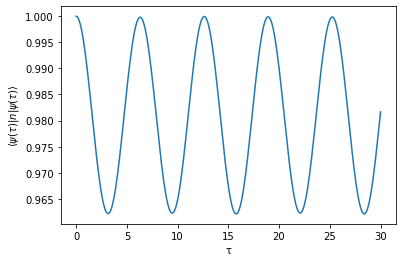

In [6]:
quench(H_topo, create_op1.dot(v), 0.1, 301, num_op1)

Also, it can get the same dynamic pattern as Christian's notebook (at the 6st site, a bulk site):We cannot see its decay as expected.

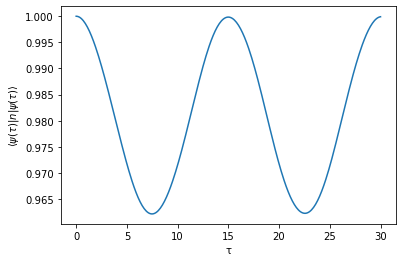

In [7]:
quench(H_topo, create_op6.dot(v), 0.1, 301, num_op6)

# PBC

In [8]:
H_pbc = H_Quad_topo_perio((2,2), 0.1, 1)
E_pbc, v_pbc = sparse.linalg.eigsh(H_pbc, which = 'SA', k = 1)
E__pbcshow, v_pbcshow = sparse.linalg.eigsh(H_pbc, which = 'SA', k = 8)
print(E__pbcshow)

[-11.34192241 -10.0691302  -10.0691302  -10.0691302  -10.0691302
  -9.92065537  -9.92065537  -9.92065537]


Also, the spectrum is the same as Christian's.

Quench at the 1st site.It can get the same dynamic pattern as Christian's codes.

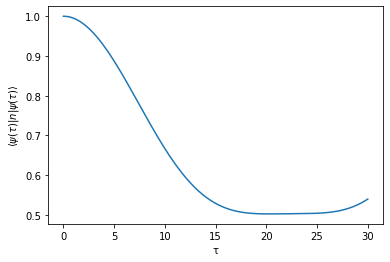

In [9]:
quench(H_pbc, create_op1.dot(v_pbc), 0.1, 301, num_op1)

Quench at the 6th site.It can get the same dynamic pattern as Christian's codes.

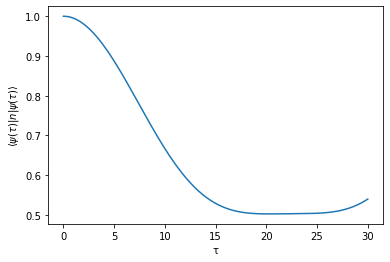

In [10]:
quench(H_pbc, create_op6.dot(v_pbc), 0.1, 301, num_op6)

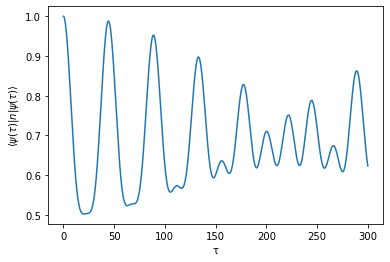

In [11]:
quench(H_pbc, create_op6.dot(v_pbc), 0.1, 3001, num_op6)